## Hypothesis Testing Assignment

In [2]:
#Importing necessary packages
import pandas as pd
import numpy as np
# package with hypothesis tests
import scipy.stats as st

### Data

You can download the data from [**here**](https://drive.google.com/file/d/0Bz9_0VdXvv9bUUNlUTVrMF9VcVU/view?usp=sharing&resourcekey=0-16O9Fc5eaJH99-M7AHqHOg). The data contains results of all NBA games from seasons 2013/2014 to 2015/2016.

In [3]:
df = pd.read_csv(r'C:\Users\silvh\OneDrive\lighthouse\probability_and_statistics_exercise\nba_games_2013_2015.csv') #this line also works
data = pd.read_csv('nba_games_2013_2015.csv',sep = ';')
# df.head()


In [21]:
data

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22015,1610612750,MIN,Minnesota Timberwolves,21501226,2016-04-13,MIN vs. NOP,W,240,144,...,0.826,5,38,43,41,14,8,13,20,35.0
1,22015,1610612749,MIL,Milwaukee Bucks,21501225,2016-04-13,MIL vs. IND,L,240,92,...,0.846,7,36,43,23,8,3,15,15,-5.0
2,22015,1610612738,BOS,Boston Celtics,21501217,2016-04-13,BOS vs. MIA,W,240,98,...,0.864,10,29,39,20,7,3,7,20,10.0
3,22015,1610612747,LAL,Los Angeles Lakers,21501228,2016-04-13,LAL vs. UTA,W,239,101,...,0.867,8,39,47,19,6,3,13,17,5.0
4,22015,1610612739,CLE,Cleveland Cavaliers,21501220,2016-04-13,CLE vs. DET,L,265,110,...,0.733,8,35,43,21,4,7,10,23,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,22013,1610612753,ORL,Orlando Magic,21300001,2013-10-29,ORL @ IND,L,241,87,...,0.600,13,26,39,17,10,6,17,26,-10.0
7376,22013,1610612748,MIA,Miami Heat,21300002,2013-10-29,MIA vs. CHI,W,239,107,...,0.759,5,35,40,26,10,7,18,21,12.0
7377,22013,1610612747,LAL,Los Angeles Lakers,21300003,2013-10-29,LAL vs. LAC,W,240,116,...,0.643,18,34,52,23,8,6,19,23,13.0
7378,22013,1610612741,CHI,Chicago Bulls,21300002,2013-10-29,CHI @ MIA,L,238,95,...,0.783,11,30,41,23,11,4,18,27,-12.0


--------------
### Task 1
Split the data into **3** separate dataframes for each NBA season!

In [24]:
# determine the unique seasons
seasons = set(data['SEASON_ID'])
seasons

{22013, 22014, 22015}

In [47]:
data13 = data[data['SEASON_ID'] == 22013]
data13.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
4920,22013,1610612742,DAL,Dallas Mavericks,21301216,2014-04-16,DAL @ MEM,L,265,105,...,0.818,15,24,39,22,11,4,13,23,-1.0
4921,22013,1610612743,DEN,Denver Nuggets,21301230,2014-04-16,DEN vs. GSW,L,241,112,...,0.829,9,33,42,23,4,4,19,28,-4.0
4922,22013,1610612762,UTA,Utah Jazz,21301218,2014-04-16,UTA @ MIN,W,291,136,...,0.828,22,38,60,30,10,9,18,34,6.0
4923,22013,1610612751,BKN,Brooklyn Nets,21301224,2014-04-16,BKN @ CLE,L,240,85,...,0.739,6,30,36,21,9,1,15,16,-29.0
4924,22013,1610612753,ORL,Orlando Magic,21301227,2014-04-16,ORL vs. IND,L,240,86,...,0.708,9,31,40,14,9,5,10,16,-15.0


In [48]:
data14 = data[data['SEASON_ID'] == 22014]
data14.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
2460,22014,1610612760,OKC,Oklahoma City Thunder,21401222,2015-04-15,OKC @ MIN,W,241,138,...,0.710,18,28,46,22,10,6,13,25,25.0
2461,22014,1610612765,DET,Detroit Pistons,21401226,2015-04-15,DET @ NYK,W,240,112,...,0.741,11,33,44,20,14,3,12,22,22.0
2462,22014,1610612766,CHA,Charlotte Hornets,21401228,2015-04-15,CHA @ TOR,L,240,87,...,0.938,8,28,36,15,8,3,12,10,-5.0
2463,22014,1610612737,ATL,Atlanta Hawks,21401217,2015-04-15,ATL @ CHI,L,240,85,...,0.714,10,32,42,15,10,10,15,19,-6.0
2464,22014,1610612759,SAS,San Antonio Spurs,21401223,2015-04-15,SAS @ NOP,L,238,103,...,0.769,4,32,36,33,2,3,15,20,-5.0


In [5]:
data15 = data[data['SEASON_ID'] == 22015]
data15.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22015,1610612750,MIN,Minnesota Timberwolves,21501226,2016-04-13,MIN vs. NOP,W,240,144,...,0.826,5,38,43,41,14,8,13,20,35.0
1,22015,1610612749,MIL,Milwaukee Bucks,21501225,2016-04-13,MIL vs. IND,L,240,92,...,0.846,7,36,43,23,8,3,15,15,-5.0
2,22015,1610612738,BOS,Boston Celtics,21501217,2016-04-13,BOS vs. MIA,W,240,98,...,0.864,10,29,39,20,7,3,7,20,10.0
3,22015,1610612747,LAL,Los Angeles Lakers,21501228,2016-04-13,LAL vs. UTA,W,239,101,...,0.867,8,39,47,19,6,3,13,17,5.0
4,22015,1610612739,CLE,Cleveland Cavaliers,21501220,2016-04-13,CLE vs. DET,L,265,110,...,0.733,8,35,43,21,4,7,10,23,-2.0


---------------
### Task 2
Test the hypothesis that the offensive productions stats of the Cleveland Cavaliers and Golden State Warriors (the teams that met in the finals that year) were from the same distribution in the 2015/2016 season.

Offensive production refers to two variables: **PTS (Points)** and **FG_PCT (Field Goal Percentage)**. We will need to do two separate hypothesis tests, one for each variable.

In [11]:
# data for points for each team
pts_cle = data15[data15['TEAM_NAME'] == 'Cleveland Cavaliers']['PTS']
pts_gold = data15[data15['TEAM_NAME'] == 'Golden State Warriors']['PTS']

# data for field goal percentage for each team
fgp_cle = data15[data15['TEAM_NAME'] == 'Cleveland Cavaliers']['FG_PCT']
fgp_gold = data15[data15['TEAM_NAME'] == 'Golden State Warriors']['FG_PCT']

In [66]:
# independent t tests for points
pts_t, pts_pvalue = st.ttest_ind(pts_cle, pts_gold)
print(pts_t, pts_pvalue)

-5.973920595717936 1.4233420547764935e-08


In [67]:
# independent t tests for field goal percentage
fgp_t, fgp_pvalue = st.ttest_ind(fgp_cle, fgp_gold)
print(fgp_t, fgp_pvalue)

-3.13195297595825 0.00206097581047554


In [13]:
def indttest(data1,data2,nullhyp="Not specified",to_print=False,alpha=0.05):
    """Check whether or not we reject a given null hypothesis
    Parameters:
        nullhyp: (string) Null hypothesis
        data1, data2: Panda series of the 2 samples to compare.
        alpha: (float, optional) P-value threshold for significance. Default is 0.05.
        to_print: (boolean, optional) Print conclusion or not. Default is no.
    Returns p-value
    """
    ttest = st.ttest_ind(data1,data2)
    if to_print:
        print('Null hypothesis tested: ',nullhyp)
        if ttest[1] < alpha:
            print('Test result: Reject the null hypothesis; samples are significantly different.\n')
        else:
            print('Test result: Fail to reject the hypothesis H0.\n')
    return ttest[1]

indttest(pts_cle, pts_gold, "Points are the same for the 2015/16 season.",True)
indttest(fgp_cle, fgp_gold, "Field goal percentages are the same for the 2015/16 season.", True)

Null hypothesis tested:  Points are the same for the 2015/16 season.
Test result: Reject the null hypothesis; samples are significantly different.

Null hypothesis tested:  Field goal percentages are the same for the 2015/16 season.
Test result: Reject the null hypothesis; samples are significantly different.



0.00206097581047554

-----------------
### Task 3
Test the hypothesis that the number of points (PTS) scored by Cleveland Cavaliers changed significantly after the head coach changed in the 2015/2016 season.

- **Coach Blatt was fired on 24th of Jan, 2016**. 

Use the data from seasons 2014/2015 and 2015/2016 - those are years when Cleveland was coached by Blatt. 

**We have two possible solutions to try here:**
- Take the same amount of games from before and after and try t-test.
- Take all the games from before and after and look for the right test to compare two samples with different sizes. (You will need to go through the scipy documentation or google to figure out what kind of test is required.)

In [6]:
dataClev = data[data['TEAM_NAME'] == 'Cleveland Cavaliers']
dataClev
# Experiment with how to extract game date

# for i in dataClev['GAME_DATE']:
#     print(i[0:5])

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
4,22015,1610612739,CLE,Cleveland Cavaliers,21501220,2016-04-13,CLE vs. DET,L,265,110,...,0.733,8,35,43,21,4,7,10,23,-2.0
40,22015,1610612739,CLE,Cleveland Cavaliers,21501203,2016-04-11,CLE vs. ATL,W,240,109,...,0.900,9,38,47,17,9,4,15,14,15.0
78,22015,1610612739,CLE,Cleveland Cavaliers,21501191,2016-04-09,CLE @ CHI,L,242,102,...,0.611,12,30,42,24,5,5,15,18,-3.0
127,22015,1610612739,CLE,Cleveland Cavaliers,21501165,2016-04-06,CLE @ IND,L,239,109,...,0.912,7,26,33,15,7,3,10,19,-14.0
151,22015,1610612739,CLE,Cleveland Cavaliers,21501159,2016-04-05,CLE @ MIL,W,241,109,...,0.900,2,39,41,30,4,8,16,14,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,22013,1610612739,CLE,Cleveland Cavaliers,21300066,2013-11-06,CLE @ MIL,L,240,104,...,0.727,12,27,39,20,10,2,9,21,-5.0
7282,22013,1610612739,CLE,Cleveland Cavaliers,21300047,2013-11-04,CLE vs. MIN,W,240,93,...,0.909,11,38,49,22,10,12,23,24,1.0
7303,22013,1610612739,CLE,Cleveland Cavaliers,21300033,2013-11-02,CLE @ IND,L,240,74,...,0.867,6,31,37,11,15,1,16,25,-15.0
7316,22013,1610612739,CLE,Cleveland Cavaliers,21300020,2013-11-01,CLE @ CHA,L,241,84,...,0.727,11,31,42,14,9,1,17,29,-6.0


In [7]:
# ALL data in 2015 season with Coach Blatt
dataBlatt = dataClev[(dataClev['SEASON_ID'] == 22015) & (dataClev['GAME_DATE'] < '2016-01-24')] 

# PTS data in 2015 season with Coach Blatt
# pointsBlatt = dataClev[(dataClev['SEASON_ID'] == 22015) & (dataClev['GAME_DATE'] < '2016-01-24')]['PTS']
# print('Number of games in 2015/16 season with Blatt: ',len(pointsBlatt))

# PTS data in 2014+2015 season with Coach Blatt
pointsBlatt = dataClev[((dataClev['SEASON_ID'] == 22014) | (dataClev['SEASON_ID'] == 22015)) & (dataClev['GAME_DATE'] < '2016-01-24')]['PTS']
print('Number of games in seasons 2014/2015 to 2015/16 with Blatt: ',len(pointsBlatt))

# PTS data in 2015 season AFTER Coach Blatt
pointsAfterB = dataClev[(dataClev['SEASON_ID'] == 22015) & (dataClev['GAME_DATE'] >= '2016-01-24')]['PTS'] 
print('Number of games in 2015/16 season AFTER Blatt: ',len(pointsAfterB))
# pointsBlatt.dtype
# # dataBlatt
# type(pointsBlatt)

Number of games in seasons 2014/2015 to 2015/16 with Blatt:  124
Number of games in 2015/16 season AFTER Blatt:  40


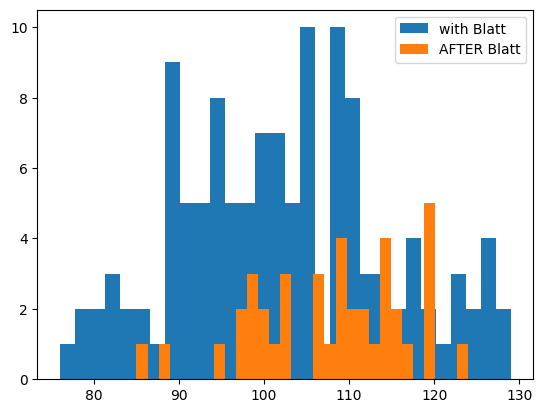

In [198]:
# Plot the data
import matplotlib.pyplot as plt
plt.hist(pointsBlatt,bins=30)
plt.hist(pointsAfterB,bins=30)
plt.legend(('with Blatt','AFTER Blatt'))
plt.show()

In [9]:
# Set number of games to sample and alpha
nsamples = 40
ntests = 1000 # number of t-tests to run
alpha = 0.05

# Perform several independent sample t-tests with random samples of games with and games after coach Blatt 
meanP = []
for test in range(ntests):
    randsampleBlatt = np.random.permutation(pointsBlatt)[0:nsamples]
    randsampleAfterB = np.random.permutation(pointsAfterB)[:nsamples]
    tstat,pvalue = st.ttest_ind(randsampleBlatt,randsampleAfterB)
    meanP.append(pvalue)
    # indttest("Coach Blatt makes no difference in points scored",randsampleBlatt,randsampleAfterB)
print("Average p value: ",sum(meanP)/ntests)
print('Number of t-tests performed: ',len(meanP)) # Check that number of p values equals number of t-tests

if sum(meanP)/ntests > alpha:
    print("Conclusion: Coach Blatt makes no difference in points scored")
else:
    print("Conclusion: Coach Blatt affects points scored")
# # ttest = indttest.ind("Coach Blatt makes no difference in points scored",randsampleBlatt,randsampleAfterB)


Average p value:  0.06413968865225776
Number of t-tests performed:  1000
Conclusion: Coach Blatt makes no difference in points scored


In [10]:
# Test the same hypothesis, but this time using independent t-test with Welch's method:
t_val_cle, p_val_cle = st.ttest_ind(pointsBlatt, pointsAfterB, equal_var=False)
print('The t-statistic is:', t_val_cle, '\nThe p-value is:', p_val_cle)

The t-statistic is: -3.020359501985649 
The p-value is: 0.0032905001945984953


----------------


### Task 4
Download [**the similar dataset**](https://drive.google.com/file/d/0Bz9_0VdXvv9bRHhuRTI1aXBQcTA/view?usp=sharing&resourcekey=0-jGIaWyk0bXyECNSzB3x38w) with scores from playoff games in 2016.

In [203]:
dataB = pd.read_csv('nba_playoff_games_2016.csv',sep = ';')
dataB.head()


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42015,1610612739,CLE,Cleveland Cavaliers,41500407,2016-06-19,CLE @ GSW,W,241,93,...,0.840,9,39,48,17,7,6,11,15,4.0
1,42015,1610612744,GSW,Golden State Warriors,41500407,2016-06-19,GSW vs. CLE,L,239,89,...,0.769,7,32,39,22,7,5,10,23,-4.0
2,42015,1610612744,GSW,Golden State Warriors,41500406,2016-06-16,GSW @ CLE,L,238,101,...,0.690,9,26,35,19,5,3,14,25,-14.0
3,42015,1610612739,CLE,Cleveland Cavaliers,41500406,2016-06-16,CLE vs. GSW,W,240,115,...,0.781,8,37,45,24,12,7,10,25,14.0
4,42015,1610612739,CLE,Cleveland Cavaliers,41500405,2016-06-13,CLE @ GSW,W,241,112,...,0.609,8,33,41,15,11,9,16,22,15.0


------------
### Task 5
Test the hypothesis that **number of blocks (BLK)** are from the same distribution in both the NBA playoffs and in the NBA regular season for 2015/2016 seaon for the **Toronto Raptors**. 

- We will be working with two samples with different sizes again.

In [209]:
#List the seasons in the data set B
print('Seasons in data set: ',len(set(dataB['SEASON_ID'])))


Seasons in data set:  1


In [222]:
from statistics import mean

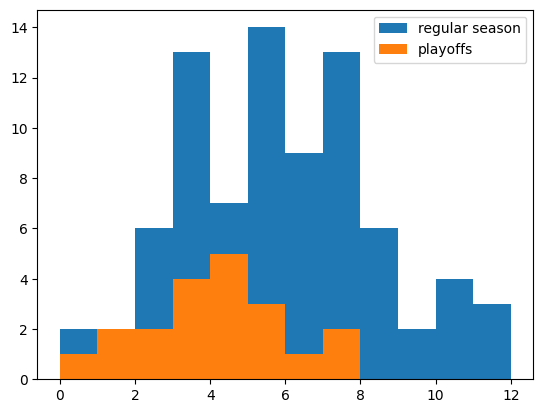

In [224]:
rapReg = data15[data15['TEAM_NAME'] == "Toronto Raptors"]['BLK'] # data from Raptors' 2015/16 regular season
rapPO = dataB[dataB['TEAM_NAME'] == "Toronto Raptors"]['BLK'] #blocks from Raptor's playoff seasons
bins = range(max(rapReg)-min(rapReg))
plt.hist(rapReg,bins=bins)
plt.hist(rapPO,bins=bins)
plt.legend(('regular season','playoffs'))
plt.show()


In [285]:
# Perform an independent t-test comparing blocks in regular season vs. playoff season for the Raptors
indttest(rapReg,rapPO,"hypothesis",True,alpha)

Null hypothesis tested:  hypothesis
Test result: Reject the null hypothesis; samples are significantly different.



0.005902131643198316

In [282]:
# Define a function 

def indttest_randsamp(data1,data2,nullhyp="Not specified", ntests=1000,nsamples=False, alpha=0.05):
    """Perform several independent sample t-tests with random samples t-tests, each time using a random sub-sample from each sample
     Parameters:
        data1, data2: Panda series of the 2 samples to compare.
        nullhyp: (string, optional) Null hypothesis.
        ntests: (int, optional) How many t-tests to perform. Default is 1000.
        nsamples: (int, optional) Size of sub-sample. Default is equal to smallest sample size.
        alpha: (float, optional) P-value threshold for significance. Default is 0.05.
        to_print: (boolean, optional) Print results of individual t-tests or not. Default is no.
    Returns average p-value obtained.
    """
    if nsamples == False:
        nsamples=min([len(data1),len(data2)])
    allPValues = []
    for test in range(ntests):
        randsample1 = np.random.permutation(data1)[:nsamples]
        randsample2 = np.random.permutation(data2)[:nsamples]
        pvalue = indttest(randsample1,randsample2,nullhyp,False,alpha)
        allPValues.append(pvalue)
    # print(allPValues)
    print('Power (alpha): ',alpha)
    print("Average p value: ",sum(allPValues)/len(allPValues))
    print('Sample size: ', nsamples)
    print('Number of t-tests performed: ',len(allPValues)) # Check that number of p values equals number of t-tests
    print('Null hypothesis tested: ',nullhyp)
    if sum(meanP)/ntests < alpha:
        print("Conclusion: Reject the null hypothesis; samples are significantly different.")
    else:
        print("Conclusion: Fail to reject the hypothesis H0.")
    return sum(allPValues)/len(allPValues)

In [286]:
# Perform 5000 independent t-tests comparing blocks in regular season vs. playoff season for the Raptors

indttest_randsamp(rapReg,rapPO,"No difference in BLK between regular season vs. playoff season.",5000)

Power (alpha):  0.05
Average p value:  0.04736214201843789
Sample size:  20
Number of t-tests performed:  5000
Null hypothesis tested:  No difference in BLK between regular season vs. playoff season.
Conclusion: Reject the null hypothesis; samples are significantly different.


0.04736214201843789


-----------------
### Task 6
Test the hypothesis that the number of points (PTS) scored by Cleveland Cavaliers is equally distributed for all 3 seasons. 

- In this case, we need a hypothesis test that compares more than 2 distributions at the same. (You will need to go through the scipy documentation or google to figure out what kind of test is required.)

In [15]:
# I looked up homogeneity of variance in my old statistics textbook. It said to test for homeogeneity of variance using Levene's test, which
# happens to be available through scipy https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

# Extract Cleveland points data for each season 
clev13 = dataClev[dataClev['SEASON_ID'] == 22013]['PTS']
clev14 = dataClev[dataClev['SEASON_ID'] == 22014]['PTS']
clev15 = dataClev[dataClev['SEASON_ID'] == 22015]['PTS']
clev15

4       110
40      109
78      102
127     109
151     109
       ... 
2336     96
2364    107
2399    102
2440    106
2456     95
Name: PTS, Length: 82, dtype: int64

In [63]:
# Calculate Levene statistics. Set Centre to mean instead of the default of median. Set proportion to cut as 0 instead of default of 0.05)

def levene_test(*samples,center = 'mean', alpha = 0.05):
    """
    Input:
        Samples: List of arrays of sample data.
        Centre: ({mean, median, trimmed}, optional) Default set as 'mean'. 
        Alpha: (optional) Threshold of p for statistical significance. Default is 0.05.

    """
    if center == False:
        center = 'mean'
    
    leveneStat, leveneP  = st.levene(*samples, center=center, proportiontocut = 0)
    print('Based on levene test with center set to ',center,"...")
    print('Statistic: ',leveneStat)
    print('P value: ',leveneP)
    if leveneP > alpha:
        print('Homogeneity of variance (homoscedasticity) is met.')
    else:
        print('Homogeneity of variance (homoscedasticity) is violated.')
    print('\n')
    return leveneStat, leveneP

levene_test(clev13, clev14,clev15)
levene_test(clev13, clev14,clev15, center='median')

Based on levene test with center set to  mean ...
Statistic:  0.7598047344796496
P value:  0.46886572166835905
Homogeneity of variance is met.


Based on levene test with center set to  median ...
Statistic:  0.7268088885666648
P value:  0.48449719064746033
Homogeneity of variance is met.




(0.7268088885666648, 0.48449719064746033)

In [38]:
# Cross-check to see the custom function to see if it works
st.levene(clev13, clev14,clev15,center = 'mean', proportiontocut = 0)

LeveneResult(statistic=0.7598047344796496, pvalue=0.46886572166835905)

#### Follow Up
**Between which seasons can we see the significant difference?**

+ Unfortunatelly, this is not the output of an ANOVA test and further tests are needed to be run.
+ Note: Lebron James came back to the Cleveland Caveliers prior to season 2014/2015. We can use this fact to interpret our results correctly.

In [69]:
# Checked resources for how to perform one-way ANOVA:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html?highlight=anova
# https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/

Fstat, pvalueClevPts = st.f_oneway(clev13, clev14,clev15)
print(pvalueClevPts)

# Custom function that evaluates whehter or not to reject null hypothesis
def evaluate_test(p,alpha = 0.05):
    """
    PARAMS:
    - p (float) - p-value from any test
    - alpha (optional,float) - significance level
    """
    if p < alpha:
        print("We reject the hypothesis H0; significant differences found!")
    else:
        print("We fail to reject the hypothesis H0; no significant differences found.")
    return

evaluate_test(pvalueClevPts)

0.003087727119983984
We reject the hypothesis H0; significant differences found!


In [20]:
# Perform independent t-tests to compare seasons

indttest(clev13, clev14,nullhyp="No differences in points between the 2013 vs. 2014 seasons",to_print=True)
indttest(clev14,clev15,nullhyp="No differences in points between the 2014 vs. 2015 seasons",to_print=True)
indttest(clev13, clev15,nullhyp="No differences in points between the 2013 vs. 2015 seasons",to_print=True)

Null hypothesis tested:  No differences in points between the 2013 vs. 2014 seasons
Test result: Reject the null hypothesis; samples are significantly different.

Null hypothesis tested:  No differences in points between the 2014 vs. 2015 seasons
Test result: Fail to reject the hypothesis H0.

Null hypothesis tested:  No differences in points between the 2013 vs. 2015 seasons
Test result: Reject the null hypothesis; samples are significantly different.



0.001043164899206325